# 911 Calls Project

For this capstone project I will explore some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

I will try to explore the data using my Python and Data Science skills!

## Data and Setup

**Import pandas, numpy and visualization libraries**

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read csv file as a dataframe called df**

In [3]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Explorations

**Top 5 zipcodes for 911 calls**

In [7]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Top 5 townships (twp) for 911 calls**

In [8]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Count how many uniques title code are there**

In [9]:
df['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I will use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [15]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [19]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Most common Reason for a 911 call based off of reason**

In [20]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

**Creating a countplot of 911 calls by Reason**

<AxesSubplot:xlabel='reason', ylabel='count'>

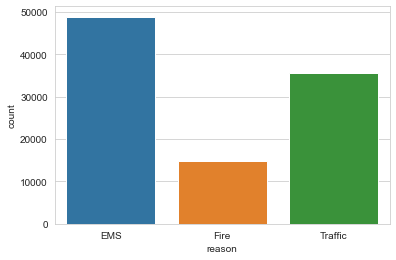

In [273]:
sns.countplot(data=df, x='reason')

**Exploring timeStamp type**


In [31]:
type(df['timeStamp'][0])

str

**Converting the column from strings to DateTime objects and adding new columns 'hour', 'month', 'day'**

In [32]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [50]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [52]:
df['month'] = df['timeStamp'].apply(lambda x: x.month)

In [111]:
df['day'] = df['timeStamp'].apply(lambda x: x.day_name())

In [115]:
df['day'].value_counts()

Tuesday      15150
Wednesday    14879
Friday       14833
Monday       14680
Thursday     14478
Saturday     13336
Sunday       12136
Name: day, dtype: int64

**Creating a countplot of the day of week**

<AxesSubplot:xlabel='day', ylabel='count'>

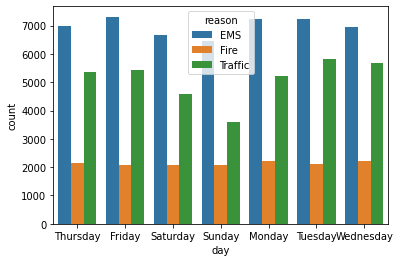

In [116]:
sns.countplot(data=df, x='day', hue='reason')

**Now do the same for Month:**

<AxesSubplot:xlabel='month', ylabel='count'>

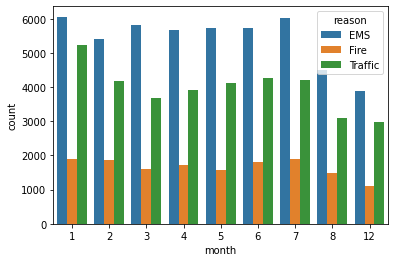

In [117]:
sns.countplot(data=df, x='month', hue='reason')

**There are some missing months (9, 10, 11) in plot. To solve that some work with pandas**

**Creating a gropuby object called byMonth**

In [129]:
byMonth = df.groupby('month').count()

In [130]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Simple plot off of the dataframe indicating the count of calls per month**

<AxesSubplot:xlabel='month', ylabel='twp'>

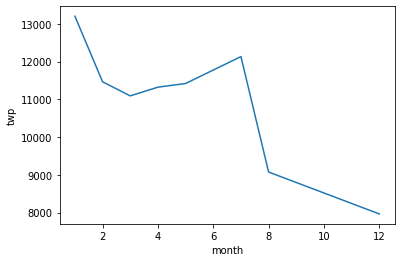

In [142]:
sns.lineplot(data=byMonth, y='twp', x=byMonth.index)

**lmplot() to create a lineer fit on the number of calls per month**

In [147]:
byMonth= byMonth.reset_index()

In [274]:
byMonth

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


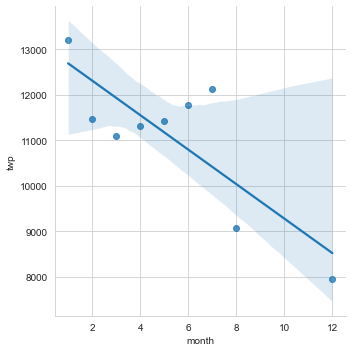

In [153]:
sns.set_style('whitegrid')
sns.lmplot(data=byMonth, x='month', y='twp')

**New column called 'new_date' that contains the date from the timeStamp column.** 

In [157]:
df['new_date'] = df['timeStamp'].apply(lambda x: x.date())

In [159]:
df['new_date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: new_date, Length: 99492, dtype: object

**Now groupby this new_date column with the count() aggregate and create a plot of counts of 911 calls**

In [275]:
byDay = df.groupby('new_date').count()

<AxesSubplot:xlabel='new_date'>

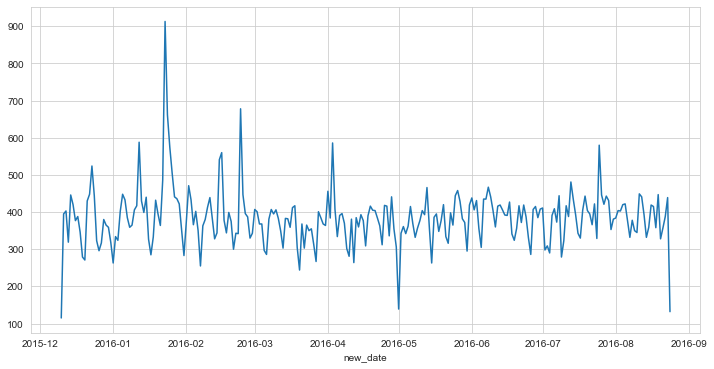

In [195]:
plt.figure(figsize=(12, 6))
byDay['twp'].plot()

**Now recreating this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [174]:
byReason = df.groupby('reason')
byReason.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,month,day,new_date
reason,,,,,,,,,,,,,
EMS,48877,48877,48877,44327,48877,48877,48853,48877,48877,48877,48877,48877,48877
Fire,14920,14920,14920,13012,14920,14920,14903,14900,14920,14920,14920,14920,14920
Traffic,35695,35695,35695,29298,35695,35695,35693,35196,35695,35695,35695,35695,35695


<AxesSubplot:title={'center':'Traffic'}, xlabel='new_date'>

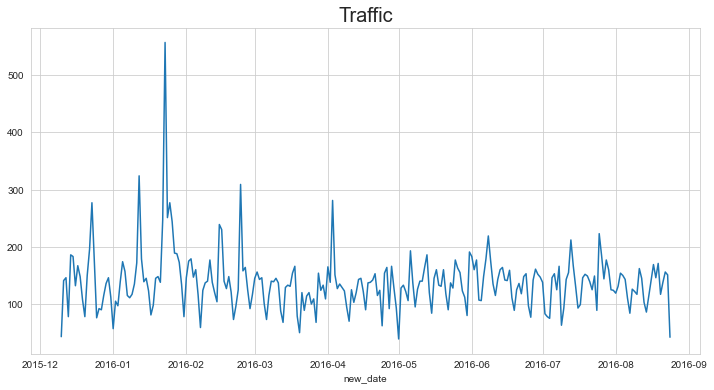

In [196]:
plt.figure(figsize=(12, 6))
plt.title('Traffic', fontsize=20)
df[df['reason'] == 'Traffic'].groupby('new_date')['twp'].count().plot()

<AxesSubplot:title={'center':'EMS'}, xlabel='new_date'>

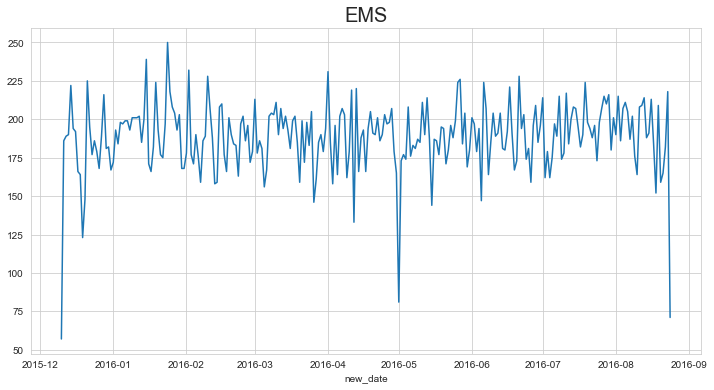

In [197]:
plt.figure(figsize=(12, 6))
plt.title('EMS', fontsize=20)
df[df['reason'] == 'EMS'].groupby('new_date')['twp'].count().plot()

<AxesSubplot:title={'center':'Fire'}, xlabel='new_date'>

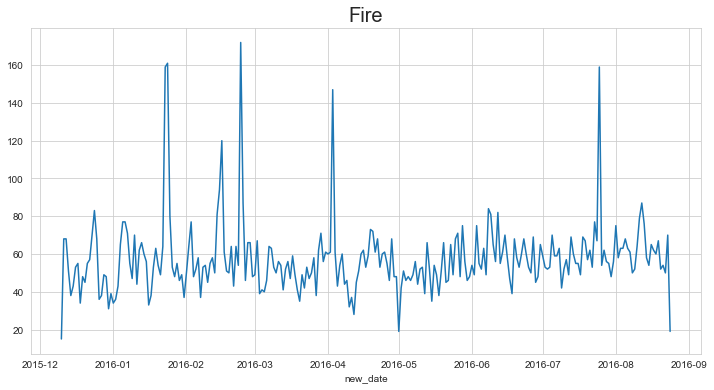

In [209]:
plt.figure(figsize=(12, 6))
plt.title('Fire', fontsize=20)
df[df['reason'] == 'Fire'].groupby('new_date')['twp'].count().plot()

**Heatmaps and clustermaps by day and hour**

In [213]:
dayHour = df.groupby(by=['day', 'hour'])

In [227]:
dayHour = dayHour.count()['twp'].unstack()

<AxesSubplot:xlabel='hour', ylabel='day'>

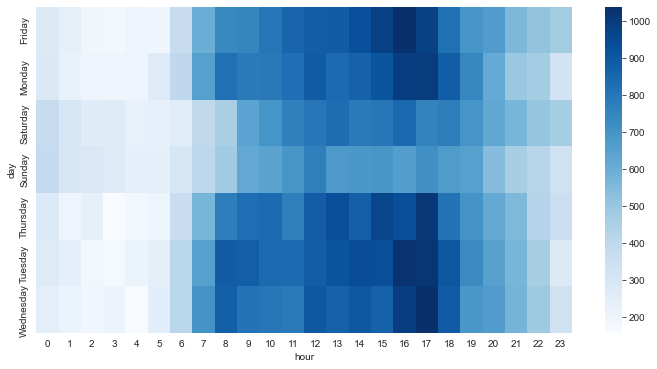

In [232]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour, cmap='Blues')

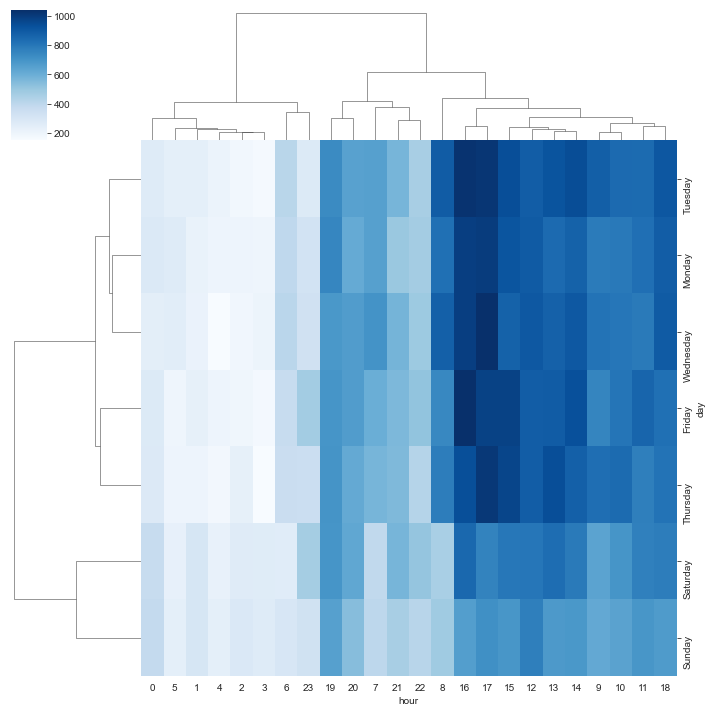

In [234]:
sns.clustermap(dayHour, cmap='Blues')

**Heatmaps and clustermaps by day and month**

In [259]:
day_month = df.groupby(by=['day', 'month'])

In [265]:
day_month = day_month.count()['twp'].unstack()
day_month

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
Friday,1970,1581,1523,1958,1730,1649,2045,1310,1064
Monday,1727,1964,1533,1597,1779,1617,1692,1509,1256
Saturday,2290,1440,1264,1732,1444,1388,1695,1099,978
Sunday,1960,1229,1100,1488,1422,1331,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tuesday,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wednesday,1699,1902,1888,1517,1538,2054,1715,1295,1260


<AxesSubplot:xlabel='month', ylabel='day'>

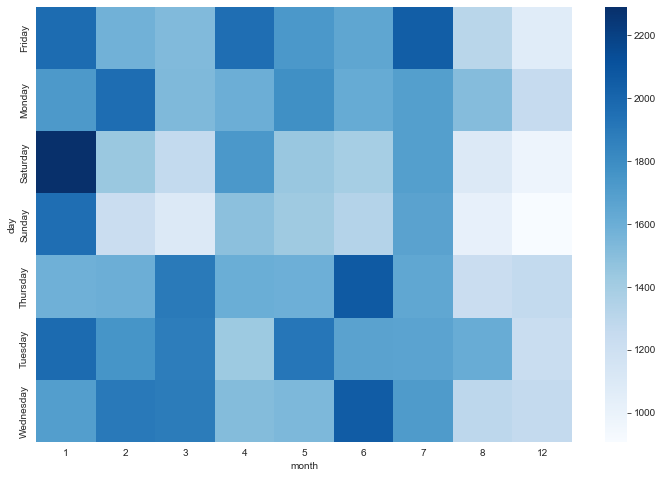

In [269]:
plt.figure(figsize=(12, 8))
sns.heatmap(day_month, cmap='Blues')

<Figure size 864x576 with 0 Axes>

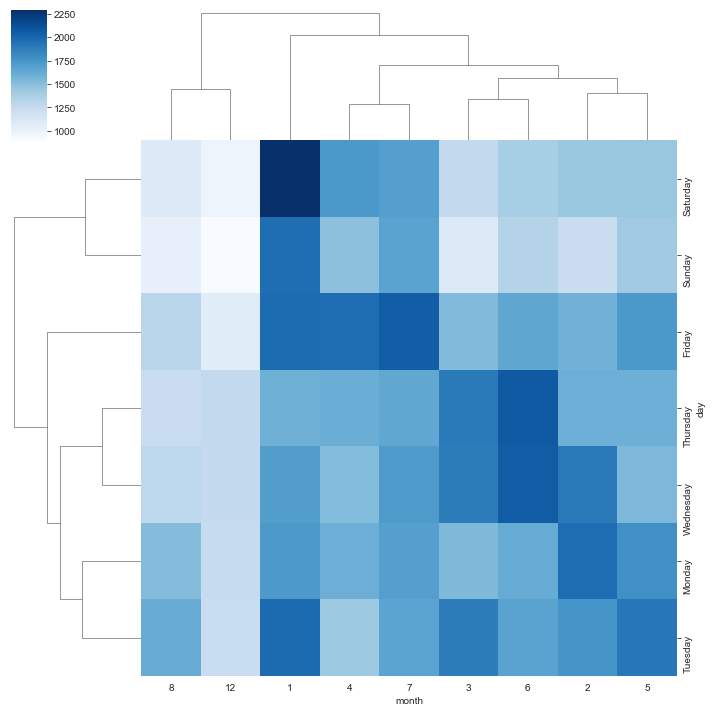

In [272]:
plt.figure(figsize=(12, 8))
sns.clustermap(day_month, cmap='Blues')